# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
X = data[['RM', 'LSTAT', 'PTRATIO']]
y = data[['MEDV']]
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


** Visualize the statistics helps to correlate each feature's relationship with the target variable, the prices **

Text(0,0.5,'Prices')

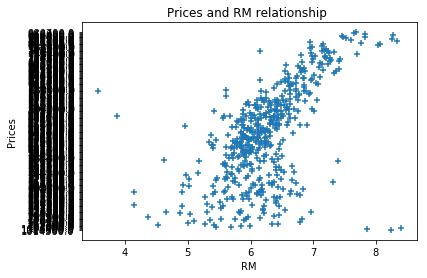

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X.RM,y,  marker='+')
# s=80, c=z, marker=">")
plt.title('Prices and RM relationship ')
plt.xlabel('RM')
plt.ylabel('Prices')

Text(0,0.5,'Prices')

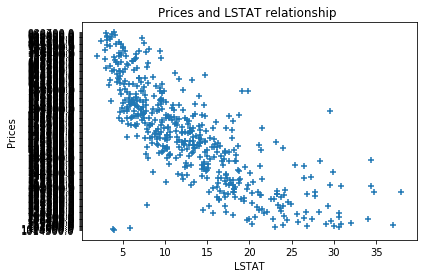

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X.LSTAT,y,  marker='+')
# s=80, c=z, marker=">")
plt.title('Prices and LSTAT relationship ')
plt.xlabel('LSTAT')
plt.ylabel('Prices')

Text(0,0.5,'Prices')

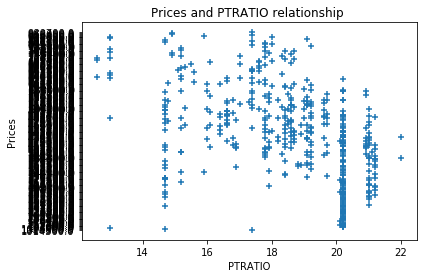

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X.PTRATIO,y,  marker='+')
# s=80, c=z, marker=">")
plt.title('Prices and PTRATIO relationship ')
plt.xlabel('PTRATIO')
plt.ylabel('Prices')

## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [5]:
import numpy as np

# TODO: Minimum price of the data
#minimum_price = prices.min()
minimum_price = np.min(prices)
# TODO: Maximum price of the data
#maximum_price = prices.max()
maximum_price = np.max(prices)

# TODO: Mean price of the data
#mean_price = prices.mean()
mean_price = np.mean(prices)

# TODO: Median price of the data
#median_price = prices.median()
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
#prices_np = prices.values
#std_price = prices_np.std()
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price)) 
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

- Would you expect a home that has an 'RM' value(number of rooms) of 6 be worth more or less than a home that has an 'RM' value of 7?
> Ans: I expect that the larger the 'RM' value, the higher the home price. Therefore, I believe a home has an 'RM' value of 7 would be worth more than a home has an 'RM' value of 6 for most cases. 

- Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20?
> Ans: I expect that a neighborhood that has higher 'LSTAT' value (percent of lower class workers) the lower the housing price. Therefore, I expect that a neighborhood has an 'LSTAT' value 15 would have home prices be worth more than a neighborhood that has an 'LSTAT" value of 20. 

- Would you expect a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an 'PTRATIO' value of 15?
> Ans: I expect that a neighborhood that has the lower the 'PTRATIO" value (ratio of students to teachers) the higher the home price. Therefore, I expect that a neighborhood that has an 'PTRATIO' value of 10 would have home prices be worth more than a neighborhood that has an 'LSTAT' value of 20. 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [6]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [7]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**
* Would you consider this model to have successfully captured the variation of the target variable? 
> Ans: - Yes. 
* Why or why not?
> Ans: Because R2 score of 0.923 means that 92.3% of the variance in Y is predictable from X. When 92.3% of the variance in Y is predictable, I would consider this model to have successfully caputred the variation of the target variable.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [8]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


/anaconda3/envs/py363_Adrain/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

The benefit to split a dataset into some ratio of training and testing subsets for learning algorithms is that we can make use of the training accuracy and the testing accuracy to find out whether the model is overfitting or underfitting. 

For example, when we have chosen a complex model and resulting in overfitting, the training accuracy is very high but the testing accurasy is not high. Only when choose the right model both the training and testing accuracy will be high. If we choose a very simple model, we will have the both training and testing accuracy to be low. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

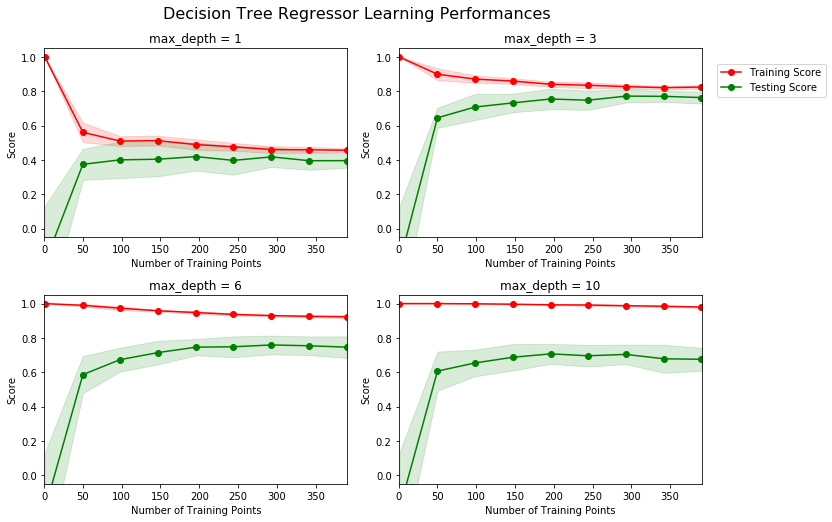

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
depth_range =[1,3,6,10]
vs.ModelLearning(features, prices, depth_range)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

* Choose one of the graphs above and state the maximum depth for the model. 
> - Ans: The best model is the decision tree with meximum depth =3.
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
> - Ans: The score of the training score is high when there is fewer training points. For example, when there is one training point, a model can fit that point accurately. As more training points are added, the training score will become lower as the model needs to fit to more and more points. The testing score curve can be low when the model is trained with say 1 sample point, as more and more points added to train the model and testing score will become higher. As the number of training points is increase to certain number the model parameter changes can be negligible, at this point both the training score and testing score converge to a stable stage. If the model is just right, both the training score and testing score will converge to a high score as the number of points added. If the model is too simple (underfitting), then these two scores will converge to a low score. If the trianing score is converges to a high score, while the testing score converges to a low score, that means overfitting. The model is too complex and it starts to memorize the training points.  
* Would having more training points benefit the model? 
> - Ans: Adding more training points will benefit the model when the training score and testing score are in the process of converging. When the training score is stablized, adding more training points won't benefit the model as at this stage the model parameters have converged to its expected values. 




### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

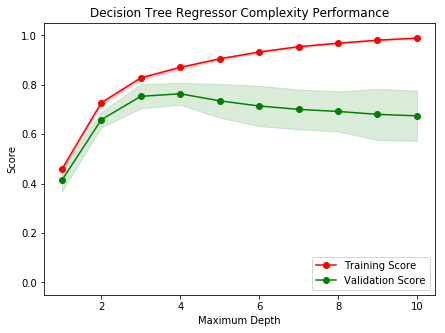

In [10]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

- When the model is trained with a maximum depth of 1, the model suffers from high bias. It can be observed that both the training score and the validation score are low. This is due to the model complexity is not enough. 
- When the model is trained with a maximum depth of 10, it can be observed from the graph that the training score is high but the validation score is low. This shows that the model is too complex that it starts to suffer from overfitting. 

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

* Which maximum depth do you think results in a model that best generalizes to unseen data? 

> Ans: 
 - My initial answer was the maximum depth =3 results in a model that best generalizes to unseen data.
 - After answering Question 9, I would choose maximum depth = 4 results in a model that best generalizes to unseen data. (See details from answers of Question 9 for the reason).


* What intuition lead you to this answer?

> Ans: It can be observed from the graph above Question 5 that both the training score and the validation score increase as the depths increase till when it reaches depth=3 or 4. This shows that as the model complexity increase, the model becomes better-fit model. But as the depth increases larger than 3 or 4, the training score continue to increase and the validation score starts to depart from the trend of training score. The gaps between training score and validation score starts to enlarge as the depth increases. This shows that when maximum depth >4, the model starts to suffer from overfitting. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **
* What is the grid search technique?
> - Grid search technique is used for optimizing the hyper-parameters of the model. 
* How it can be applied to optimize a learning algorithm?
> - Ans: To apply grid seach to optimize a learning algorithm cna be explained using an example. For example, for decision tree, the hyper-parameters includes max_depth, max_features, max_leaf_nodes, min_samples_leaf, min_samples_split, etc. One can use grid search technique to search over given possible choices for these hyper-parameters and pick the optimal hyper parameter based on certain metrics. For example in the above graph max_depth is searched over a range of 1 to 10. The optimum max_depth=3 will be returned.  


- How it can be applied to optimize a learning algorithm? 

  
> The reference link given by the reviewer provides a very detailed answer to the question. Below are answers found from the link given by the review http://scikit-learn.org/stable/modules/grid_search.html:  
> - Grid search is used for tuning the hyper-parameters of an estimator
> - Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.
> - It is possible and recommended to search the hyper-parameter space for the best cross validation score.
> - Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use:
> estimator.get_params() (see below examples)

In [11]:
from sklearn.tree import DecisionTreeRegressor

estimator = DecisionTreeRegressor(random_state=42)
estimator.get_params()


{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [12]:
from sklearn.svm import SVR
estimator = SVR()
estimator.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

> * A search consists of:
>    * an estimator (regressor or classifier such as sklearn.svm.SVC());
>    * a parameter space;
>    * a method for searching or sampling candidates;
>    * a cross-validation scheme; and
>    * a score function.
> - Some models allow for specialized, efficient parameter search strategies, outlined below. 

> - Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, GridSearchCV exhaustively considers all parameter combinations, while RandomizedSearchCV can sample a given number of candidates from a parameter space with a specified distribution. After describing these tools we detail best practice applicable to both approaches.

> - Note that it is common that a small subset of those parameters can have a large impact on the predictive or computation performance of the model while others can be left to their default values. It is recommended to read the docstring of the estimator class to get a finer understanding of their expected behavior, possibly by reading the enclosed reference to the literature.

### GridSearchCV is Exhaustive Grid Search
> - The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. For instance, the following param_grid:



In [13]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

- The above specifies that two grids should be explored: one with a linear kernel and C values in [1, 10, 100, 1000], and the second one with an RBF kernel, and the cross-product of C values ranging in [1, 10, 100, 1000] and gamma values in [0.001, 0.0001].
- The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.
- Examples of using grid search with cross-validation can also be found at http://scikit-learn.org/stable/modules/grid_search.html






## <font color = 'green' > An example of using GridSearchCV for optimizing SVR and KRR models for boston housing price prediction </font>

In [14]:
# Below are example usage of GridSearchCV for optimizing SVR and KRR model for boston 
# housing price
# The code was modified from the following reference.
# Ref: http://scikit-learn.org/stable/auto_examples/plot_kernel_ridge_regression.html#sphx-glr-auto-examples-plot-kernel-ridge-regression-py
# Date: 3 Nov 2018

from __future__ import division
import time

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

# #############################################################################
# Features and target data

X = data[['RM', 'LSTAT', 'PTRATIO']]
y = data[['MEDV']]
X = X.astype('float')
y = y.astype('float')

# Create cross-validation sets from the training data
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
# Generate the training set sizes increasing by 50
train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

In [15]:
# #############################################################################
# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), 
                   param_grid = [
                      {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                      {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                   ],
                   cv = cv_sets,
                   scoring = 'r2')

In [16]:
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), #cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)}, 
                  scoring = 'r2',
                  cv = cv_sets)

In [17]:
svr.fit(X, np.ravel(y))
best_svr = svr.best_estimator_

In [18]:
kr.fit(X,y)
best_kr = kr.best_estimator_

In [19]:
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(best_svr, X, np.ravel(y), cv = cv_sets, train_sizes = train_sizes,
                   scoring="r2")

In [20]:
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(best_kr, X, y, cv = cv_sets, train_sizes = train_sizes,
                   scoring="r2")

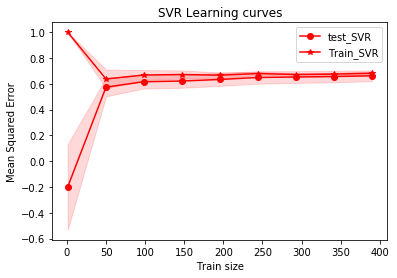

In [21]:
# Plot the learning curve of SVR model. 
# The below code is modified from the visuals.py given in the project file.
plt.figure()

plt.plot(train_sizes, np.mean(test_scores_svr, axis=1), 'o-', color="r",
         label="test_SVR")
plt.plot(train_sizes, np.mean(train_scores_svr, axis=1), '*-', color="r",
         label="Train_SVR")

plt.fill_between(train_sizes, np.mean(test_scores_svr, axis=1) - np.std(test_scores_svr, axis=1), \
            np.mean(test_scores_svr, axis=1) + np.std(test_scores_svr, axis=1), alpha = 0.15, color = 'r')
plt.fill_between(train_sizes, np.mean(train_scores_svr, axis=1) - np.std(train_scores_svr, axis=1), \
            np.mean(train_scores_svr, axis=1) + np.std(train_scores_svr, axis=1), alpha = 0.15, color = 'r')
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('SVR Learning curves')
plt.legend(loc="best")

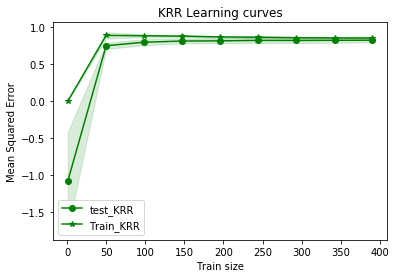

In [22]:
# Plot the learning curve of KRR model
# The below code is modified from the visuals.py given in the project file.

plt.figure()

plt.plot(train_sizes, np.mean(test_scores_kr, axis=1), 'o-', color="g",
         label="test_KRR")
plt.fill_between(train_sizes, np.mean(test_scores_kr, axis=1) - np.std(test_scores_kr, axis=1), \
            np.mean(test_scores_kr, axis=1) + np.std(test_scores_kr, axis=1), alpha = 0.15, color = 'g')
plt.plot(train_sizes, np.mean(train_scores_kr, axis=1), '*-', color="g",
         label="Train_KRR")
plt.fill_between(train_sizes, np.mean(train_scores_kr, axis=1) - np.std(train_scores_kr, axis=1), \
            np.mean(train_scores_kr, axis=1) + np.std(train_scores_kr, axis=1), alpha = 0.15, color = 'g')

plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('KRR Learning curves')
plt.legend(loc="best")

In [23]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions SVR
for i, price in enumerate(best_svr.predict(client_data)):
    print("SVR: Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

SVR: Predicted selling price for Client 1's home: $400,451.79
SVR: Predicted selling price for Client 2's home: $52,258.48
SVR: Predicted selling price for Client 3's home: $747,052.45


In [24]:
# Show predictions of KRR
client_data_ = np.array(client_data)
predicted_price = best_kr.predict(client_data_)
for i, price in enumerate(predicted_price):
    print("KRR: Predicted selling price for Client {}'s home is: ${:,.2f} ".format(i+1,predicted_price[i][0])) 

KRR: Predicted selling price for Client 1's home is: $353,491.81 
KRR: Predicted selling price for Client 2's home is: $163,905.12 
KRR: Predicted selling price for Client 3's home is: $973,134.97 


### Discussion
By using GridSearchCV, the KRR and SVR models' hyper-parameters are tuned. I used the above exercise to try out the exhaustive grid search GridSearchCV to optimize the hyper-parameters for KRR and SVR. Without tuning the hyper-parameters, the models can perform badly. 

Compared KRR, SVR and DT, KRR has the highest R2 score and SVR has the lowest R2 score. All the prediction follows similar trend. Since the R2 scores of KRR and DT are closer to each other, the predict


### The reference link  provides a very detailed answer to the question  http://scikit-learn.org/stable/modules/grid_search.html on Randomized Parameter Optimization

Below info is copied from the above link for easy reference.




### 3.2.3. Tips for parameter search
3.2.3.1. Specifying an objective metric
By default, parameter search uses the score function of the estimator to evaluate a parameter setting. These are the sklearn.metrics.accuracy_score for classification and sklearn.metrics.r2_score for regression. For some applications, other scoring functions are better suited (for example in unbalanced classification, the accuracy score is often uninformative). An alternative scoring function can be specified via the scoring parameter to GridSearchCV, RandomizedSearchCV and many of the specialized cross-validation tools described below. See The scoring parameter: defining model evaluation rules for more details.

3.2.3.2. Specifying multiple metrics for evaluation
GridSearchCV and RandomizedSearchCV allow specifying multiple metrics for the scoring parameter.

Multimetric scoring can either be specified as a list of strings of predefined scores names or a dict mapping the scorer name to the scorer function and/or the predefined scorer name(s). See Using multiple metric evaluation for more details.

When specifying multiple metrics, the refit parameter must be set to the metric (string) for which the best_params_ will be found and used to build the best_estimator_ on the whole dataset. If the search should not be refit, set refit=False. Leaving refit to the default value None will result in an error when using multiple metrics.

See Demonstration of multi-metric evaluation on cross_val_score and GridSearchCV for an example usage.

3.2.3.3. Composite estimators and parameter spaces
Pipeline: chaining estimators describes building composite estimators whose parameter space can be searched with these tools.

3.2.3.4. Model selection: development and evaluation
Model selection by evaluating various parameter settings can be seen as a way to use the labeled data to “train” the parameters of the grid.

When evaluating the resulting model it is important to do it on held-out samples that were not seen during the grid search process: it is recommended to split the data into a development set (to be fed to the GridSearchCV instance) and an evaluation set to compute performance metrics.

This can be done by using the train_test_split utility function.

3.2.3.5. Parallelism
GridSearchCV and RandomizedSearchCV evaluate each parameter setting independently. Computations can be run in parallel if your OS supports it, by using the keyword n_jobs=-1. See function signature for more details.

3.2.3.6. Robustness to failure
Some parameter settings may result in a failure to fit one or more folds of the data. By default, this will cause the entire search to fail, even if some parameter settings could be fully evaluated. Setting error_score=0 (or =np.NaN) will make the procedure robust to such failure, issuing a warning and setting the score for that fold to 0 (or NaN), but completing the search.

3.2.4. Alternatives to brute force parameter search
3.2.4.1. Model specific cross-validation
Some models can fit data for a range of values of some parameter almost as efficiently as fitting the estimator for a single value of the parameter. This feature can be leveraged to perform a more efficient cross-validation used for model selection of this parameter.



### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **
* What is the k-fold cross-validation training technique? 



> Ans: k-fold cross-validation training technique make good use of the training data. It seperate the data set into training set and test set. A test set should still be held out for final evaluation. In the basic k-fold cross-validation training approach, called k-fold CV, the training set is split into k smaller sets. The following procedure is followed for each of the k “folds”:
A model is trained using k−1 of the folds as training data;
the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set). This is a major advantage where the number of samples is small.

* What benefit does this technique provide for grid search when optimizing a model?


> Ans: The benefit that this technique provide for grid search when optimizing a model is that it won't use a particular subset of data for validation. It doesn't need to split the data into training, validation and testing set. By seperating the data with one more validation set, the number of samples will dramastically reduced for training and may cause the training samples to be insufficient and cause the model to be less accurate. The grid search optimizes the hyper-parameters by optimize certain performance metrics. By only holding testing set for testing and make good use of the training data with kfold method, all of the training data are used for training and validation iteratively. A model is trainied using k-1 of the folds as training data; the resulting model is validated on the remaining part of the data. The averaged score is used. In this way, the model won't depend on small set of data for training and validation.  



### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.model_selection` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [25]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [26]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **
- What maximum depth does the optimal model have? 
> Ans: Parameter 'max_depth' is 4 for the optimal model. 
- How does this result compare to your guess in Question 6?
> Ans: Compare this with my previous choise of max_depth =3, there is slightly difference in training and testing scores. This is mainly because in the learning curve, we only plot the cases for depth_range = [1, 3, 6, 10] and if we change 6 to 4, and take a closer look and we may find out that max_depth =4 have slightly better training and test scores (See Figure below).

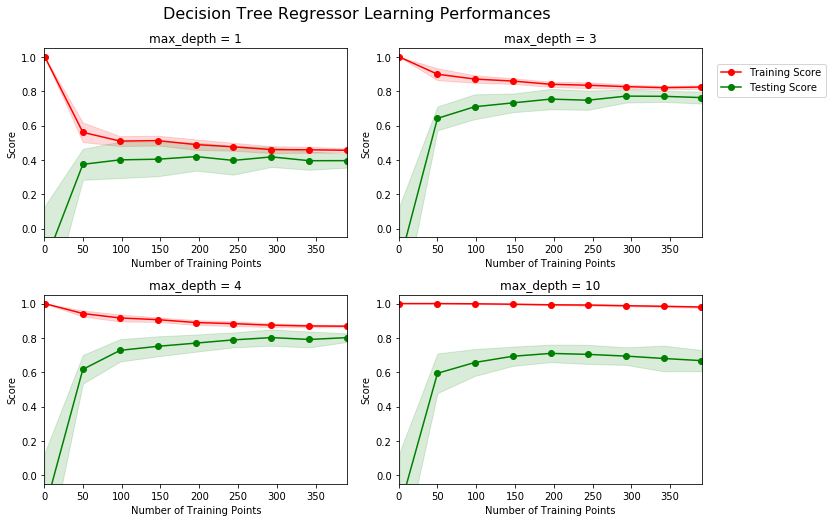

In [27]:
# Produce learning curves for varying training set sizes and maximum depths
depth_range =[1,3,4,10]
vs.ModelLearning(features, prices, depth_range)

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [28]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: **

* What price would you recommend each client sell his/her home at? 

> Ans: As the predicted selling price are:
> - Predicted selling price for Client 1's home: $403,025.00

> - Predicted selling price for Client 2's home: $237,478.72

> - Predicted selling price for Client 3's home: $931,636.36

> - I would recommend each client the above selling price if the market condition is similar to when the data is collected and if the features are sufficiently enough for giving a good prediction.

* Do these prices seem reasonable given the values for the respective features? 

> Ans: Yes, these prices seems reasonable. We expect that 1.  the more rooms the higher the selling price; 2. The higher the poverty level, the lower the price; 3. The lower the 'Student-teacher ratio of nearby schools' the higher the price. The prices predicted satisfied these expectations.
> Of the three clients, 
> - client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level. It has the highest predicted price.
> - while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools. It has the lowest predicted price.
> - and client 1 has a medium size home, in a neighborhood with not very high and not very low poverty rate and not the best nor the worst public schools. Its price is also not the highest nor the lowest.




### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [29]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $411,000.00
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $428,316.00
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $28,652.84


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

The constructed model should not be used in real-world setting because of the following reasons.

1. The data was collected from 1978 and may not be very relevant as the inflation over so many years will change the price significantly.
2. The features in the data only include very limited information which is insufficient to describe a home. I do think quality of appliances in the home, square feet of the plot area, presence of the pool and distance to shopping area, distance to school and office and crime rate etc will influence the home prices too.
3. The model is robust enough to predict consistent predictions as the range in prices calculated for ten times is around 28k which is not a big number compare to the average price of prediction which is around 400k.
4. Data collected in an urban city like Boston is not applicable in a rural city. Usually urban city provides more jobs, schools, hospitals etc than rural city, so the price is usually higher.
5. It is not fair to judge the price of an individual home based on the characteristics of the entire neighborhood.


A pratically usable model should use recent data from different neighborhoods to build different models with different model parameters for different neighborhoods. The model should be updated regularly whenever the data statistics changed. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.